# The Sparks Foundation
## Vedashree Joshi
### Task6 : Prediction using Decision Tree algorithm

In this task, we will perform the Decision Tree algorithm on the dataset regarding plants' properties.

### Import all the needed libraries

In [6]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [7]:
my_data=pd.read_csv('Iris.csv')
my_data.head(11)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### Pre-processing

Using <b>my_data</b> as the Iris.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector </b> (target) </li>
</ul>

In [13]:
X = my_data[['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',]].values
X[0:5]

array([[1. , 5.1, 3.5, 1.4, 0.2],
       [2. , 4.9, 3. , 1.4, 0.2],
       [3. , 4.7, 3.2, 1.3, 0.2],
       [4. , 4.6, 3.1, 1.5, 0.2],
       [5. , 5. , 3.6, 1.4, 0.2]])

In [14]:
y = my_data["Species"]
y[0:5]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>

In [18]:
speciesTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
speciesTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>

In [ ]:
speciesTree.fit(X_trainset,y_trainset)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>


In [20]:
predTree = speciesTree.predict(X_testset)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the predictions to the actual values.

In [21]:
print (predTree [0:5])
print (y_testset [0:5])


['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
47    Iris-setosa
3     Iris-setosa
31    Iris-setosa
25    Iris-setosa
15    Iris-setosa
Name: Species, dtype: object


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>

In [22]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  1.0


<hr>

<div id="visualization">
    <h2>Visualization</h2>

Let's visualize the tree

</div>


In [23]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

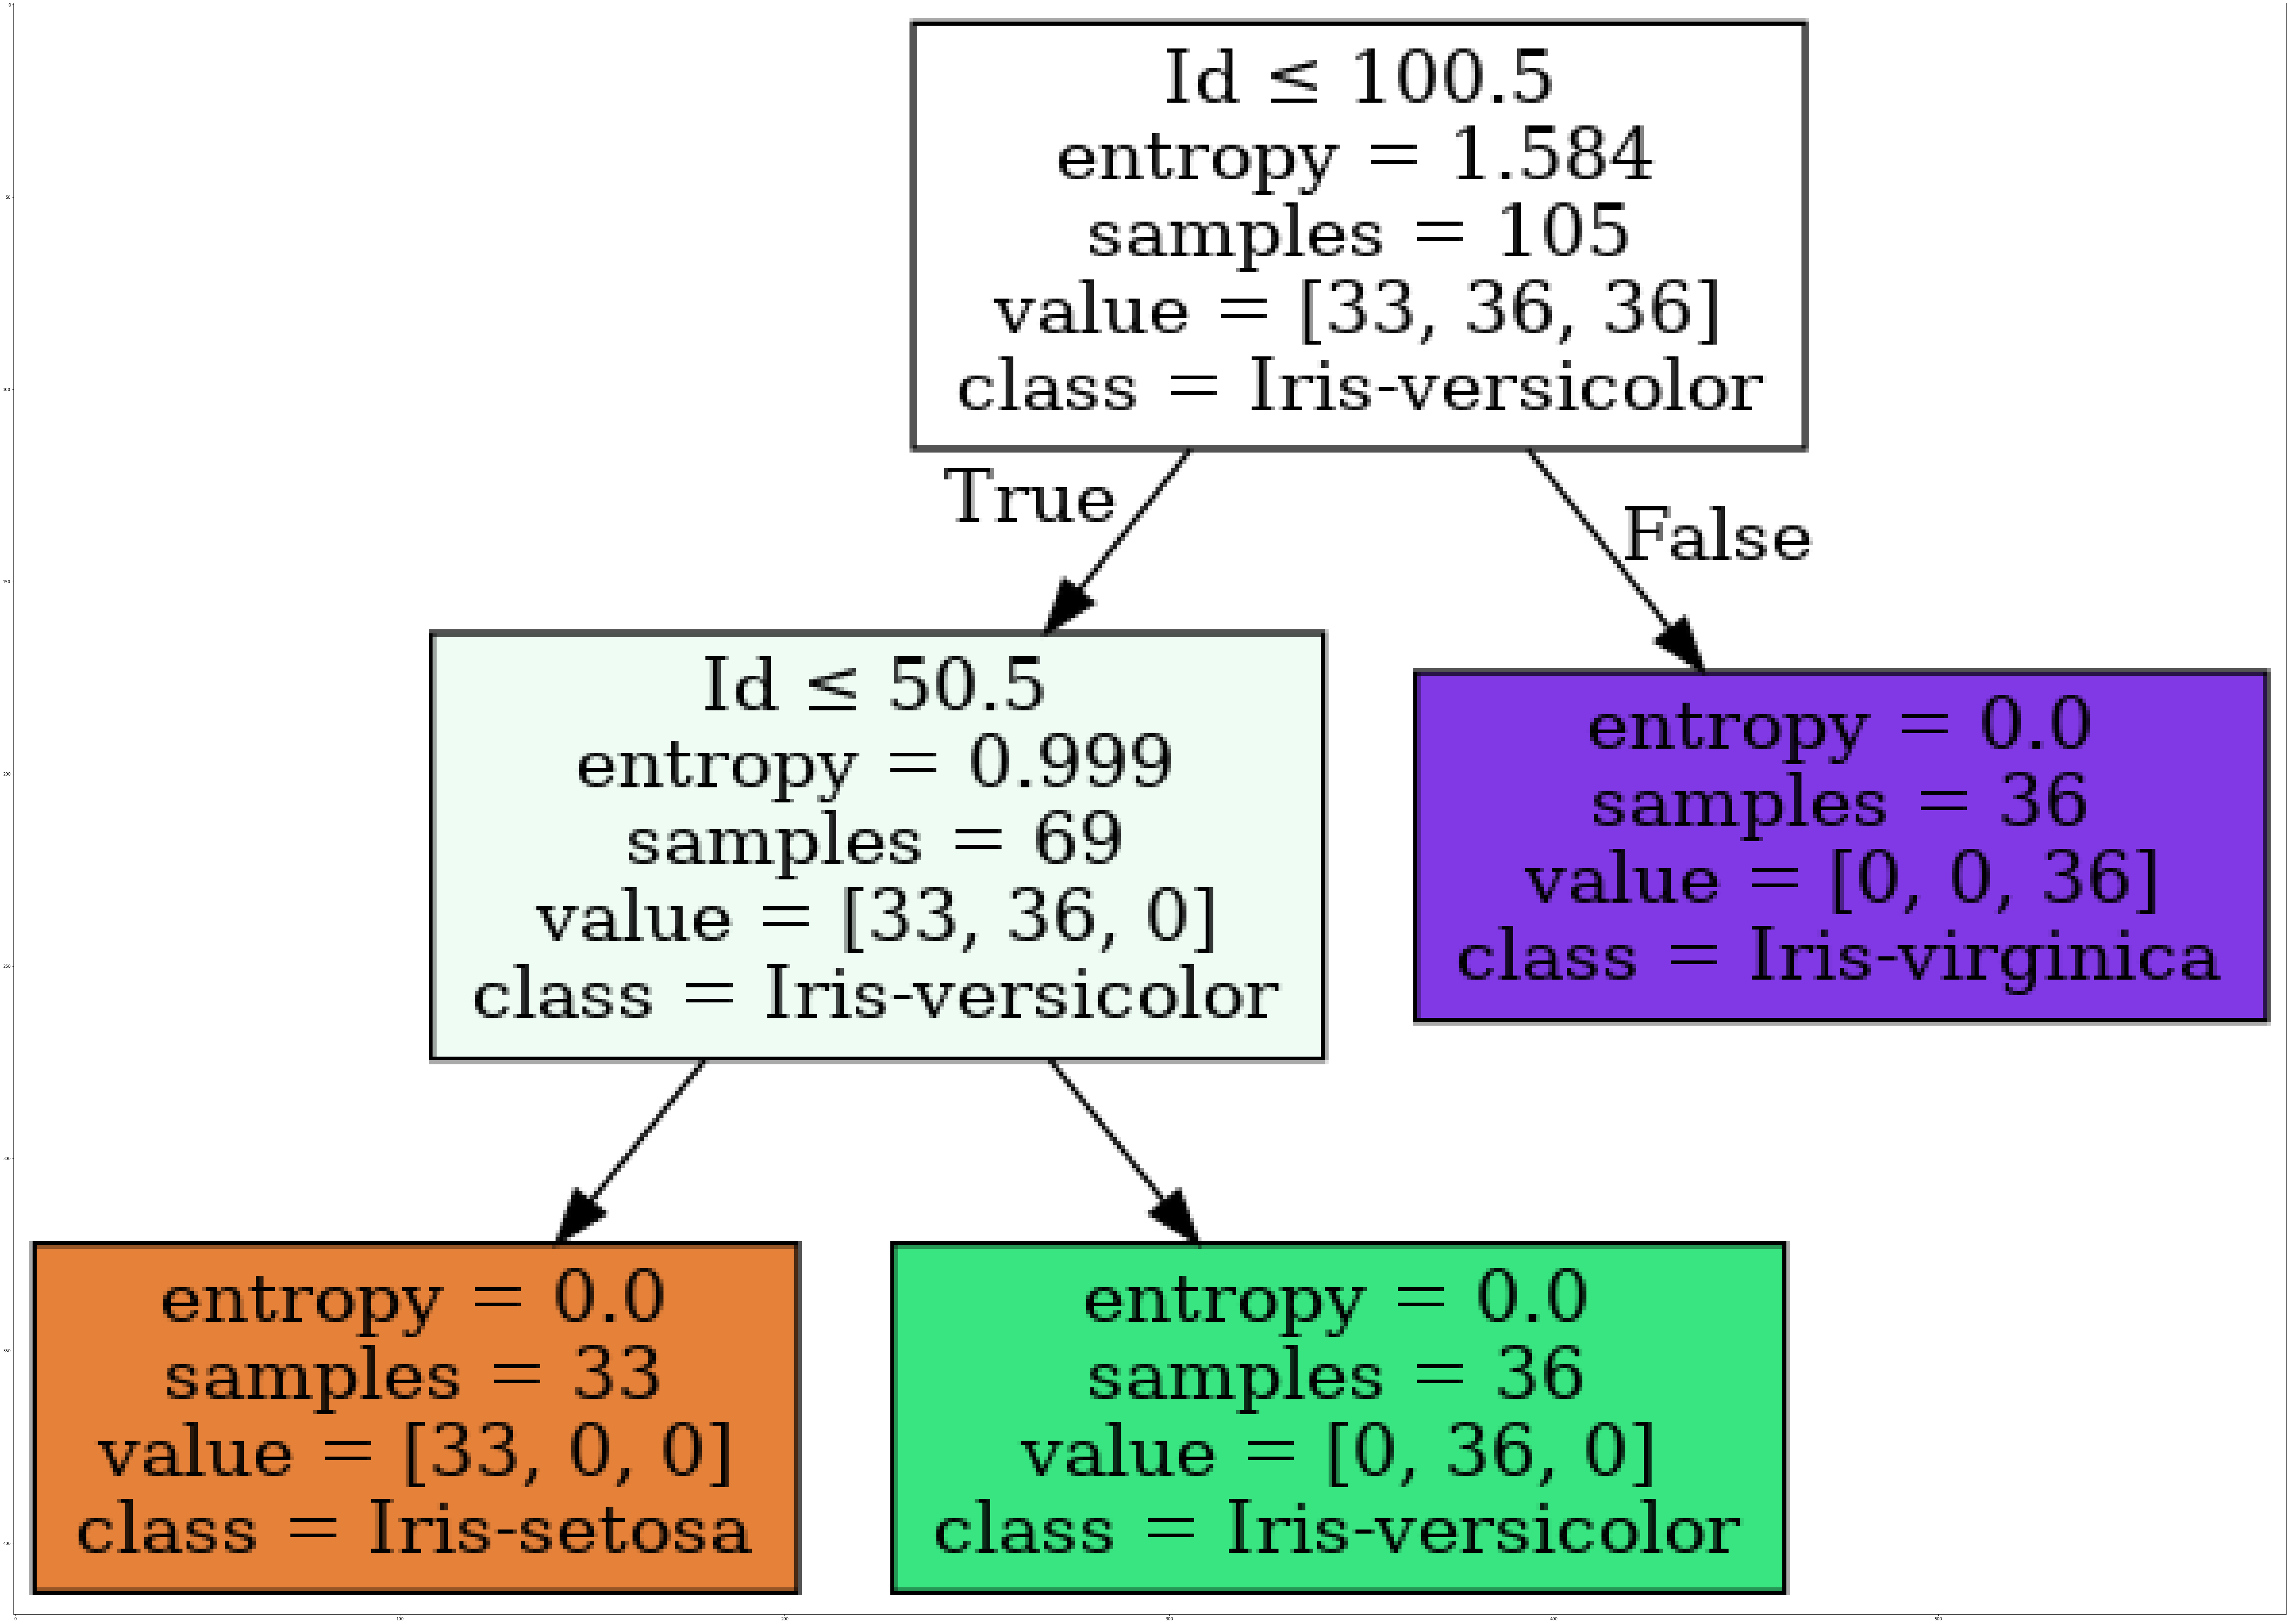

In [25]:
dot_data = StringIO()
filename = "speciestree.png"
featureNames = my_data.columns[0:5]
out=tree.export_graphviz(speciesTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')